# ITMAL Exercise

REVISIONS|
---------|------------------------------------------------
2018-1219| CEF, initial.                  
2018-0206| CEF, updated and spell checked. 
2018-0206| CEF, added Kaggle dataset exercise. 

## Vanilla Datasets

There are a number of popular datasets out-there, that are used again and again for small scale testing in ML: most popular are Moon, MNIST, Iris and CIFAR(10/100). We will use the three first here. 

(More on ML datasets: https://en.wikipedia.org/wiki/List_of_datasets_for_machine_learning_research)

### Moon

<img src="Figs/moon.png" style="width:400px">

#### Qa Data load function 

We begin with a 100% synthetic dataset called moon. It creates two interleaved half-moon like datasets, and is frequently used as an XOR-like problem set (especially in Deep Learning).  

Create a `MOON_GetDataSet()` that generates moon data, based on Scikit-learn's `make_moon()` function.

Extend the `MOON_GetDataSet()`function signature to include some of the parameters found in `make_moon()`, like 'n_sample'.

Also create a `MOON_Plot()` function, that plots the data...good thing here is that the feature set is 2D and easy to handle!

X.shape= (200, 2) , y.shape= (200,)


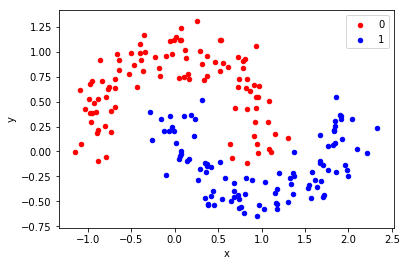

In [1]:
# TODO: Qa...

# NOTE: some free help here regarding import clauses...
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_moons
from pandas import DataFrame

def MOON_GetDataSet(n_samples):
    return make_moons(noise=0.15, random_state=5, n_samples=n_samples)
        
def MOON_Plot(X, y):
    df = DataFrame(dict(x=X[:,0], y=X[:,1], label=y))
    colors = {0:'red', 1:'blue'}
    fig, ax = plt.subplots()
    grouped = df.groupby('label')
    for key, group in grouped:
        group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
    plt.show()
    
                    
# TEST CODE:
X, y=MOON_GetDataSet(n_samples=200)
print("X.shape=",X.shape,", y.shape=",y.shape)
MOON_Plot(X,y)

#### Qb Try it with a  train-test split function

Now, use a train-test split function from Scikit-learn, that is able to split a `(X, y)` dataset tuple into a train-set and a test-set. 

Plot the train and test data using your `MOON_Plot` function.

Extend the plot function to add a plot title and x- and y-labels to the plot, say as default parameters

```python 
def MOON_Plot(X, y, title="my title", xlable="", ylabel=""):
    # implementation here...
```

or similar. Use the titles "train" and "test" when plotting the train and test data.

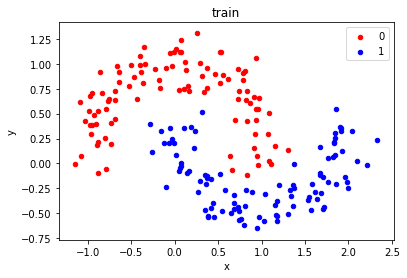

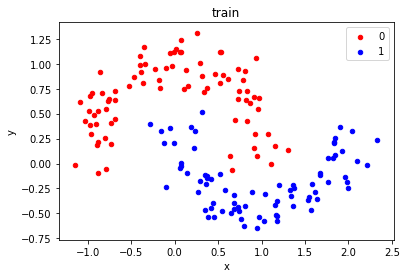

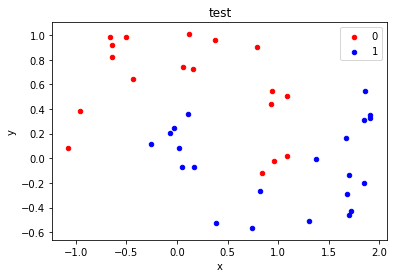

In [2]:
# TODO: Qb....

from sklearn.model_selection import train_test_split

def MOON_Plot(X, y, title="default", xlabel="", ylabel=""):
    df = DataFrame(dict(x=X[:,0], y=X[:,1], label=y))
    colors = {0:'red', 1:'blue'}
    fig, ax = plt.subplots()
    grouped = df.groupby('label')
    for key, group in grouped:
        group.plot(ax=ax, kind='scatter', title=title, x=xlabel, y=ylabel, label=key, color=colors[key])
    plt.show()
    

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
MOON_Plot(X, y, title="train", xlabel="x", ylabel="y")
MOON_Plot(X_train, y_train, title="train", xlabel="x", ylabel="y")
MOON_Plot(X_test, y_test, title="test", xlabel="x", ylabel="y")

### MNIST

MNIST is a set of 70000 handwritten digits. It is used intensively as a form of "Hello World" dataset and estimator intensively check in Machine Learning. 

<img src="Figs/mnist.png" style="width:400px">

<!-- ![MNIST](https://upload.wikimedia.org/wikipedia/commons/thumb/2/27/MnistExamples.png/220px-MnistExamples.png)-->


https://en.wikipedia.org/wiki/MNIST_database

#### Qc Data load function 

Now for the MNIST data set, creating an easy to use data-loader, `MNIST_GetDataSet()`.

There are several ways of getting the MNIST dataset. You could base the data loader on the `fetch_mldata('MNIST original')` function or try to use the `keras.datasets.mnist.load_data()` function. 

The later function pre-splits into a train-test set, and to be compatible with the former, you must concatenate the train-test and return a plain `X, y` set. 

Also create a `MNIST_PlotDigit()`, that is able to plot a single digit from the dataset, and try to plot some of the digits in the dataset (set TEST CODE below).

Using TensorFlow backend.


X_train.shape= (60000, 28, 28) , X_test.shape= (60000,)


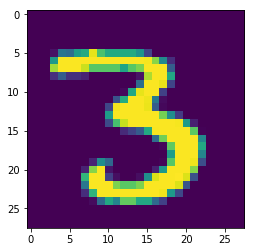

In [3]:
# TODO: Qc...

from sklearn.datasets import fetch_mldata
from keras.datasets import mnist

def MNIST_PlotDigit(data):
    image = data.reshape(28, 28)
    plt.imshow(image)

def MNIST_GetDataSet():
    return mnist.load_data()


# TEST CODE:
(X_train, X_test), (y_train, y_test) = MNIST_GetDataSet()

print("X_train.shape=",X_train.shape,", X_test.shape=",X_test.shape)
MNIST_PlotDigit(X_train[12])

## Iris

Finally, for the iris data set: a four-dimension data set for 150 iris flowers, original created by  biologist Ronald Fisher and published via a paper in 1936.

<img src="Figs/iris.jpg" style="width:400px">

<!-- https://en.wikipedia.org/wiki/File:Iris_versicolor_3.jpg -->
<!-- ![biologist Ronald Fisher](https://upload.wikimedia.org/wikipedia/commons/thumb/4/46/R._A._Fischer.jpg/200px-R._A._Fischer.jpg) -->

https://en.wikipedia.org/wiki/Iris_flower_data_set

#### Qd Data load function 

Creating the iris data loader, `IRIS_GetDataSet()`, this time we use the iris loader located in `sklearn.datasets.load_iris()`.

In [4]:
# TODO: Qd...

from sklearn.datasets import load_iris

def IRIS_GetDataSet():
    return load_iris()

#### Qe Examine the data via scatter plots

Now, as a data-scientist, it is always good to get some grasp on how your data looks like. For the iris data we now want to plot some of the features-against-some-of-the other-features to see how they separate in the given 2D-feature space.

A scatter plot for all iris features against all other may look like

<img src="Figs/Iris_dataset_scatterplot.svg.png" style="width:400px">

Create a plot function that takes just two feature dimensions and plots them in a 2D plot, and plot all features against all others (resembling the "Iris Data" scatter plot just above).

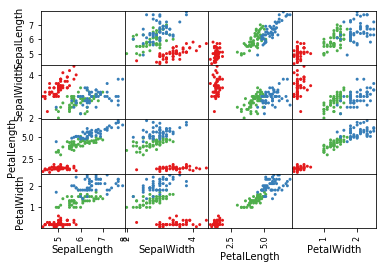

In [11]:
# TODO: Qe...
import pandas as pd
from pandas.plotting import scatter_matrix 

def IRIS_Plot(X, y):
    df = pd.DataFrame(X, columns=['SepalLength','SepalWidth', 'PetalLength', 'PetalWidth'])
    
    factor = pd.Series(y)
    classes = list(set(factor))
    palette = ['#e41a1c', '#4eae4b', '#377eb8', 
               '#994fa1', '#ff8101', '#fdfc33', 
               '#a8572c', '#f482be', '#999999']
    color_map = dict(zip(classes,palette))
    colors = factor.apply(lambda group: color_map[group])
    scatter_matrix(df, c=colors, alpha=1, diagonal=None)

data = IRIS_GetDataSet()
X = data["data"]
y = data["target"]

IRIS_Plot(X, y)

#### Qf Add your function to the `libitmal` python module

Add all your moon, MNIST and iris get and plot functions to the `libitmal` module. Call the file `dataloaders.py`, and test it in a ___new___ jupyter notebook (you need to reset the notebooks to be able to see if you are calling _cached_ version of the functions or the new ones, with similar names, in the lib module).

You will use these data loaders later, when we want to train on small datasets.

In [12]:
# TODO: Qf...

# see loader

## Your Datasets

OK, now you need to find a dataset of your own! 

Goto www.kaggle.com and find a suitable dataset, that you want to work with. We want a set somewhat larger that iris or nmist but it should not be too big. 

You need to create an account at Kaggle before you download.

One example could be the beer consumption in Sao Paulo:

> https://www.kaggle.com/dongeorge/beer-consumption-sao-paulo/version/2

It is a 'small-data' set, download gives a 5Kb comma-separated file (CSV)...


#### Qg Download a data set and do some data exploration of it

You are now a Data Scientist, go an examine your data, perhaps creating some feature scatter plots, just like the ones we just made for iris...

Are there `null`s or not-a-number data in your set? Do you have to filter these out before training?

Try to train-test split the set, perhaps just on a small set of its feature depending on the size of your data (small/medium/large/big), and try out one or two Scikit-learn ML algorithms on it just to see if it is possible.

(We return to the data set and training later...)

In [ ]:
# TODO: Qg

Introduction

For this exercise: The Heart Disease UCI is chosen. It is a smaller set, with 14 features and 303 samples.

https://www.kaggle.com/ronitf/heart-disease-uci#heart.csv

The column description are as follows: 
- ageage in years
- sex(1 = male; 0 = female)
- cpchest pain type
- trestbpsresting blood pressure (in mm Hg on admission to the hospital)
- cholserum cholestoral in mg/dl
- fbs(fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
- restecgresting electrocardiographic results
- thalachmaximum heart rate achieved
- exangexercise induced angina (1 = yes; 0 = no)
- oldpeakST depression induced by exercise relative to rest
- slopethe slope of the peak exercise ST segment
- canumber of major vessels (0-3) colored by flourosopy
- thal3 = normal; 6 = fixed defect; 7 = reversable defect
- target1 or 0

We aren't generally interested in what the features, are but more generally, which category of illness they suffer from and based on which features they do.



In [38]:
# preparation

import os

%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import accuracy_score,confusion_matrix


# Loading the dataframe from the heat-disease csv

datapath = os.path.join("../J01", "data", "heart-disease", "")
#datapath = os.path.join("../datasets", "heart-disease", "")

data_frame = pd.read_csv(datapath + "heart.csv")



In [11]:
#Describing the data_frame (set)
data_frame.describe()

age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.366337    0.683168    0.966997  131.623762  246.264026    0.148515   
std      9.082101    0.466011    1.032052   17.538143   51.830751    0.356198   
min     29.000000    0.000000    0.000000   94.000000  126.000000    0.000000   
25%     47.500000    0.000000    0.000000  120.000000  211.000000    0.000000   
50%     55.000000    1.000000    1.000000  130.000000  240.000000    0.000000   
75%     61.000000    1.000000    2.000000  140.000000  274.500000    0.000000   
max     77.000000    1.000000    3.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean     0.528053  149.646865    0.326733    1.039604    1.399340    0.729373   
std      0.525860   22.905161    0.469794    1.161075    0.616226    1.022606   
min      0.000000   71.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000  133.500000    0.000000    0.000000    1.000000    0.000000   
50%      1.000000  153.000000    0.000000    0.800000    1.000000    0.000000   
75%      1.000000  166.000000    1.000000    1.600000    2.000000    1.000000   
max      2.000000  202.000000    1.000000    6.200000    2.000000    4.000000   

             thal      target  
count  303.000000  303.000000  
mean     2.313531    0.544554  
std      0.612277    0.498835  
min      0.000000    0.000000  
25%      2.000000    0.000000  
50%      2.000000    1.000000  
75%      3.000000    1.000000  
max      3.000000    1.000000

In [12]:
# Checking for null-values, it's useful to either fill or remove null-columns

In [16]:
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


As seen above there are 303 entries (samples) and 14 columns (features)

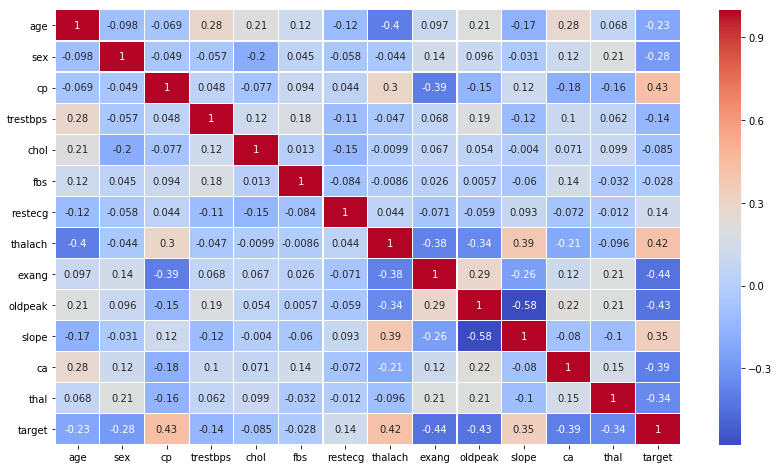

In [18]:
# We can now generate a heatmap, to show the comparison of the values

plt.figure(figsize=(14,8))
sns.heatmap(data_frame.corr(), annot = True, cmap='coolwarm',linewidths=.1)
plt.show()

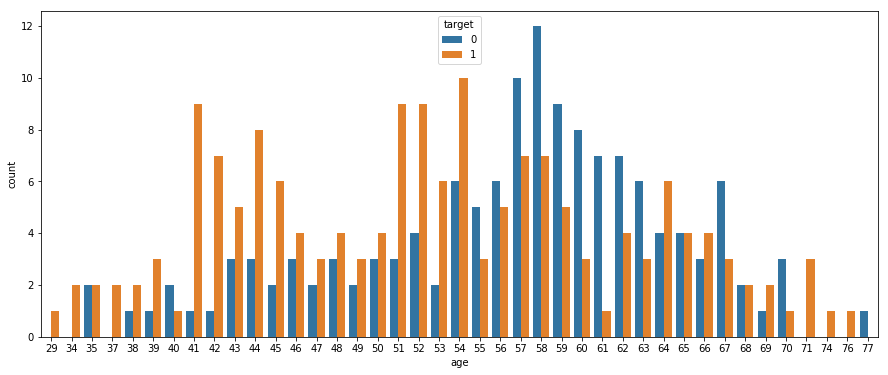

In [20]:
# It might be useful, to look at age vs heart disease for example

plt.figure(figsize=(15,6))
sns.countplot(x='age',data = data_frame, hue = 'target')
plt.show()

In [27]:
# Splitting the data for target vs data

X = data_frame.drop('target', axis=1)
y = data_frame['target']

# Using train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

# preprocessing the data (scaling features, found a link on the interwebs)

scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_train = pd.DataFrame(X_train_scaled)

X_test_scaled = scaler.fit_transform(X_test)
X_test = pd.DataFrame(X_test_scaled)

/home/hermansen/Desktop/jupyter/env/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/home/hermansen/Desktop/jupyter/env/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [43]:
# Using KNeighrest neightbor

clf = KNeighborsClassifier()
params = {'n_neighbors': [i for i in range(1,33,2)]}

model = GridSearchCV(clf, params, cv=10)

model.fit(X_train,y_train)
model.best_params_

/home/hermansen/Desktop/jupyter/env/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'n_neighbors': 7}

In [41]:
# predict

predict = model.predict(X_test)

print('Accuracy Score: ', accuracy_score(y_test, predict))

Accuracy Score:  0.8032786885245902


# Discussion

Above we imported the data, analysed that it had no null-entries, and showed a few plots. Then we selected a feature and train_set_split for the data.

After that we used a min-max scaler to even out the entries of the features.

Using k-nearest neighbors, we found the best parameter to for n_neighrest neighbor.
After that we added predictions for our test data and scored out accuracy.

# Conclusion

We added a dataset from kaggle and took inspiration from the various kernels submitted, we ended up learning a bit about minmax scaler and GridSearch. The rest we knew. As we handled the dataset ourselves, we also got some insight into pandas for data analysis.